In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, lower_sol, lower_error_samplings) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    lower_computed_solutions = [lower_sol.eval(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    lower_error = [abs(lower_computed_solution - actual_solution) for (lower_computed_solution, actual_solution) in zip(lower_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="higher_order")
    plt.plot(t_eval, lower_error, label="lower_order")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # shape of errors - graphs
    plt.figure()
    for (x_i, x_i_plus_1, hb) in error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of HIGHER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for (x_i, x_i_plus_1, hb) in lower_error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of LOWER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for ((x_i, x_i_plus_1, lower_hb), (_, _, higher_hb)) in zip(lower_error_samplings, error_samplings):
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            lower_hb_eval  = lower_hb.eval(pt)
            higher_hb_eval = higher_hb.eval(pt)
            error = abs(lower_hb_eval - higher_hb_eval)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of ESTIMATED errors between interpolants")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled estimated errors')
    # plt.legend()
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))



tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.5000000000000002, 0.9999999999999996, 0.4999999999999998]
beta values [0.9999999999999996, 1.0, 2.0, 2.0000000000000004, 1.9999999999999991, 1.9999999999999996, 1.0000000000000004, 2.000000000000001]
n_steps 17
n_successful_steps 17


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.5000000000000002, 0.9999999999999996, 0.4999999999999998, 1.0000000000000004]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.83 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.83 - evaluating the first interp


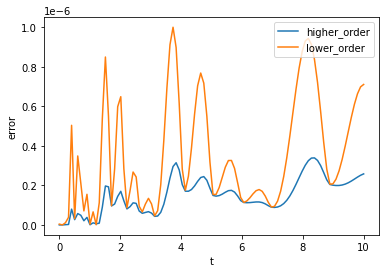

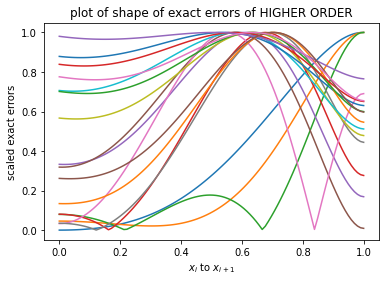

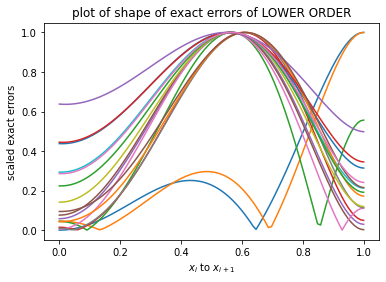

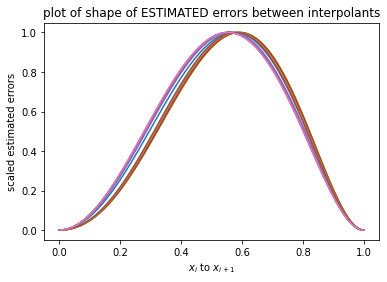

0.0
0.0
0.0
2.687983169380459e-11
5.882181408622955e-10
7.399042489808494e-09
2.53445781028816e-08
1.2866167464764544e-08
3.607900644908568e-10
7.555527203884083e-09
9.636444708860381e-08
8.133999596093844e-08
5.892738386137353e-08
4.225658845058433e-08
1.7195953777582318e-07
1.4700418288216e-07
1.1405866789937491e-07
8.903208353894243e-08
2.0310192189176846e-07
1.7133677709946227e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981, 0.5000000000000009, 1.9999999999999962, 0.5000000000000004, 0.9999999999999991]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 0.9999999999999991, 1.0000000000000018, 1.9999999999999962, 0.5000000000000009, 1.9999999999999982, 1.0000000000000009]
n_steps 38
n_successful_steps 35


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981, 0.5000000000000009, 1.9999999999999962, 0.5000000000000004, 0.9999999999999991]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.470000000000006 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.470000000000006 - evaluating the first interp


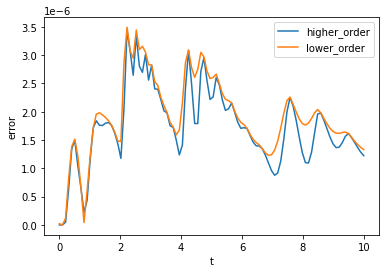

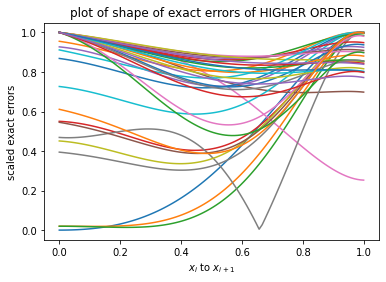

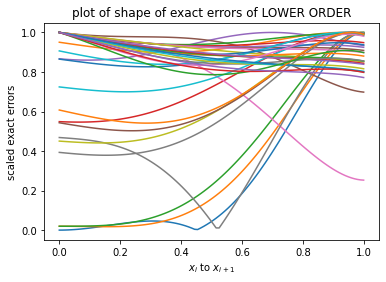

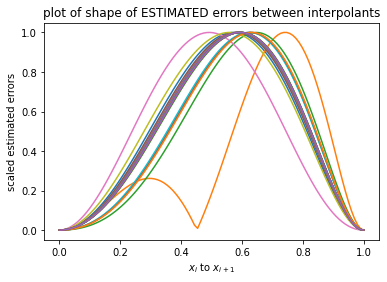

0.0
0.0
0.0
2.96594748760981e-10
1.5080521498234134e-08
7.657196535726385e-07
1.3908223965852784e-06
1.4984037676191164e-06
1.0460340186257966e-06
2.644594452316795e-07
5.639157121262173e-07
1.2487136081817951e-06
1.7159309784187116e-06
1.9716540675118743e-06
2.058795281534298e-06
2.027988686703619e-06
1.9235064346867503e-06
1.7788712320943034e-06
1.6172212139176079e-06
1.4533825290208302e-06
3.6766365149043523e-06
3.1319143050934084e-06
3.421998621383482e-06
3.207375665809087e-06
2.8237879503706376e-06
2.414792907093344e-06
2.0371230202292923e-06
1.7089714930418332e-06
3.12422473740942e-06
3.06445182784304e-06
2.621569166590121e-06
2.1400063184955076e-06
1.7186610307522165e-06
1.3755553669066167e-06
2.2432820452021607e-06
2.014315187721244e-06
1.6073781894700157e-06
1.2407463868789603e-06


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000004, 0.9999999999999996, 0.9999999999999991]
beta values [0.9999999999999996, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 2.000000000000001, 1.0000000000000004, 1.0000000000000009, 1.9999999999999982, 1.9999999999999962]
n_steps 42
n_successful_steps 24


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000004, 0.4999999999999998, 0.9999999999999996, 0.9999999999999991, 0.5000000000000004, 0.5000000000000009]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.590000000000003 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.590000000000003 - evaluating the first interp


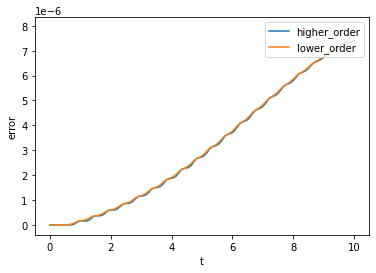

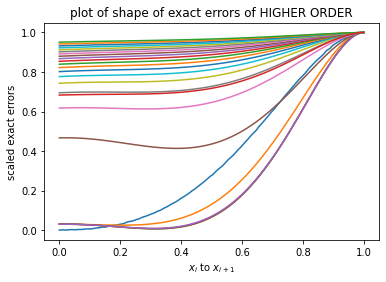

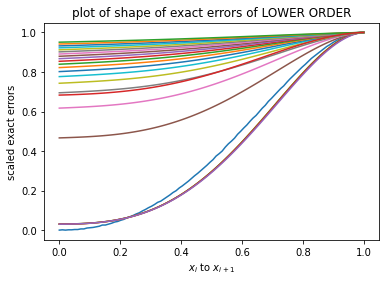

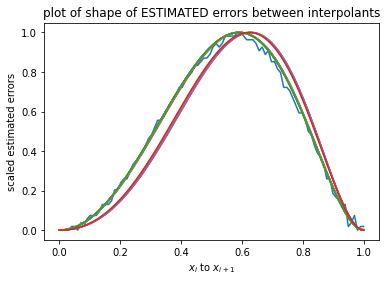

0.0
0.0
0.0
1.4699352846037073e-13
4.8692161414010116e-12
1.5752510407196496e-10
5.1397053280055616e-09
1.7064223101215248e-07
3.6578311157775545e-07
5.926953168255977e-07
8.531262321032074e-07
1.1482860511335957e-06
1.4786849424908155e-06
1.8439670221859217e-06
2.242752036973883e-06
2.6724983186454665e-06
3.1294025197858844e-06
3.608352386219593e-06
4.102947800177503e-06
4.605602280882692e-06
5.107731839260055e-06
5.600030982932935e-06
6.07282722420166e-06
6.5164968674480406e-06
6.921916962276953e-06
7.280922255326061e-06
1.0659493884901394e-05


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999991, 1.0, 2.0, 0.5, 1.0000000000000073, 0.9999999999999852, 1.0000000000000295, 0.4999999999999852, 2.000000000000059, 0.5000000000000074, 1.9999999999999705, 0.5000000000000296, 1.9999999999998817, 0.9999999999999408]
beta values [0.5, 1.0, 2.000000000000001, 2.0, 1.0000000000000009, 1.9999999999999927, 0.9999999999999926, 2.0000000000000147, 1.0000000000000149, 1.9999999999999705, 0.9999999999999704, 2.000000000000059, 0.5000000000000296, 0.4999999999999852, 1.0000000000000593, 1.9999999999998817, 0.5000000000000074]
n_steps 1751
n_successful_steps 1190


Monitor6
alpha values [0.4999999999999998, 1.0, 2.0, 0.9999999999999991, 0.5, 0.5000000000000019, 1.0000000000000073, 0.4999999999999963, 0.9999999999999852, 0.5000000000000074, 1.0000000000000295, 2.000000000000059, 0.5000000000000296, 0.4999999999999852, 1.9999999999999705, 1.9999999999998817, 0.9999999999999408]
beta values []
n_steps 0
n_successful_steps 0

integration compl

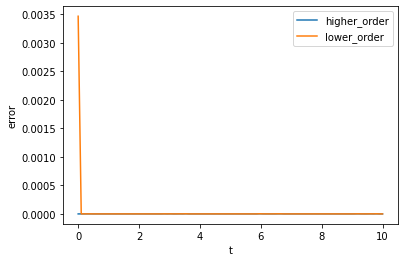

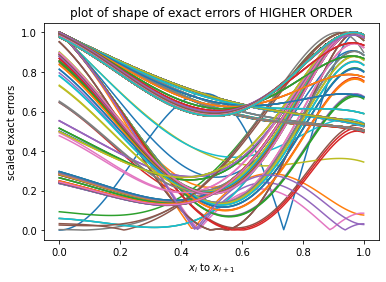

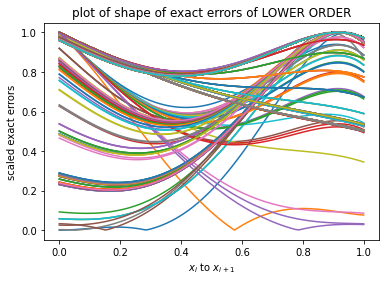

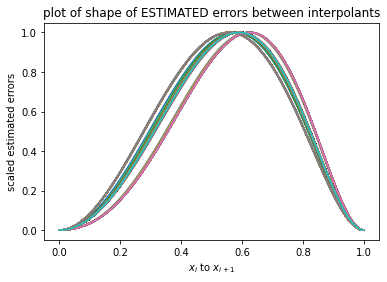

0.0
0.0
0.0
8.054757961173387e-07
6.133773100547302e-08
6.327727657684523e-07
9.553779603682644e-07
1.1722988801504686e-06
1.3517563427489776e-06
1.5188724106496299e-06
1.6819390604994044e-06
1.8435205869360427e-06
2.0043639938349678e-06
1.0005275271063319e-06
1.9482010188420773e-06
9.793318120066008e-07
5.217751345987232e-07
2.048413646343894e-06
1.034043538017393e-06
5.549003886384796e-07
2.286877617052596e-06
1.1542465823688453e-06
6.190182871845806e-07
2.5318946427210776e-06
1.2774935824189093e-06
6.845148051159988e-07
2.775162425028288e-06
1.399841872251617e-06
7.495142855806769e-07
3.015965281905064e-06
1.5209458238407692e-06
8.1384656708261e-07
3.2540559734006713e-06
1.6406819748904233e-06
8.77446891089928e-07
5.172749987791825e-07
3.4819817168463274e-07
2.6971775551887234e-07
2.3418512318240658e-07
2.1900896135518266e-07
2.1347815815087046e-07
2.1251425535995239e-07
2.1370935604503316e-07
2.1592173216067323e-07
2.1860997390099612e-07
2.215172953956568e-07
2.2452185688415227e-07

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999991, 1.0, 2.0, 0.5, 4.0, 1.0000000000000038, 0.9999999999999963, 2.0000000000000075, 0.4999999999999963, 2.0000000000000147, 1.0000000000000073, 4.0000000000000595, 3.9999999999998814, 0.5000000000000074, 2.000000000000059, 1.9999999999999705, 1.9999999999998817, 0.4999999999999852, 0.5000000000000296, 0.9999999999999852, 3.9999999999997633]
beta values [0.5, 1.0, 2.0, 2.000000000000001, 1.0000000000000009, 0.25, 0.9999999999999963, 2.0000000000000075, 1.0000000000000038, 1.9999999999999962, 2.0000000000000147, 2.000000000000059, 0.2500000000000074, 0.5000000000000074, 0.2500000000000148, 1.9999999999999705, 1.0000000000000149, 1.9999999999998817, 0.2499999999999963, 0.4999999999999852, 0.5000000000000296, 0.9999999999999926, 0.4999999999999963, 0.49999999999999817]
n_steps 532
n_successful_steps 421


Monitor6
alpha values [0.5, 1.0, 2.0, 0.9999999999999991, 0.4999999999999998, 4.0, 1.0000000000000038, 0.49999999999999817, 0.99999

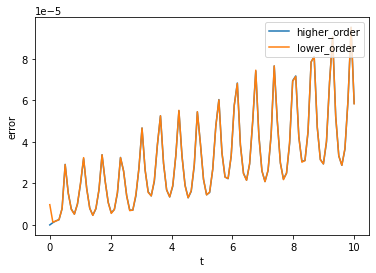

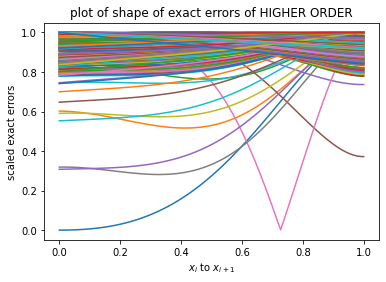

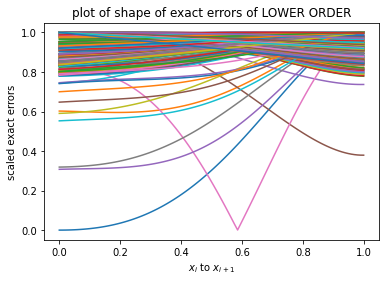

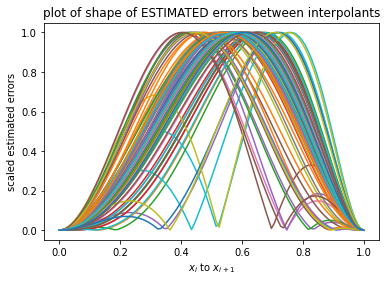

0.0
0.0
0.0
1.2671036988542994e-06
2.103940499598167e-06
2.465171889731721e-06
2.3352988449687473e-06
1.7210190650374102e-06
6.52836122494449e-07
8.031548319742399e-07
2.5190258754470563e-06
4.265957053162239e-06
5.73955902427592e-06
7.186736520781167e-06
7.925276745535115e-06
8.871904999097069e-06
1.008215441200555e-05
3.278215964819253e-05
3.287790566042226e-05
3.1800573566442836e-05
2.9415383856701283e-05
2.667553502599951e-05
2.414807132766761e-05
2.197348656785003e-05
2.0122989293547278e-05
1.8542200974414058e-05
1.5218703946384693e-05
1.2296734606564996e-05
9.718056984464596e-06
7.623502572773333e-06
6.1026180429024635e-06
5.197376227616957e-06
4.924141835616069e-06
5.285998155635241e-06
6.276552233508426e-06
7.87665408719107e-06
1.0042069519045072e-05
1.26777882152318e-05
1.5608605199224357e-05
1.8683863193036387e-05
2.285285197967113e-05
2.5047104416753285e-05
2.750430900055889e-05
3.0025046843906722e-05
3.2013620142379295e-05
3.257396588063344e-05
3.1312559640506166e-05
2.8856

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000004, 0.9999999999999996]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 1.0000000000000004]
n_steps 20
n_successful_steps 19


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000002, 1.0000000000000004, 0.9999999999999996]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 11.19 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 11.19 - evaluating the first interp


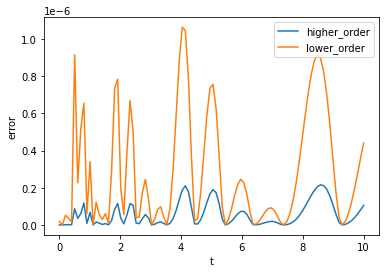

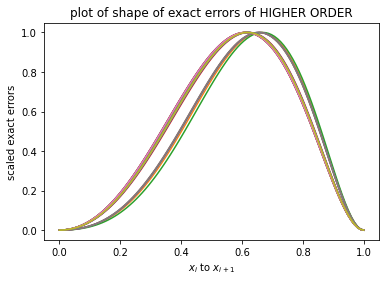

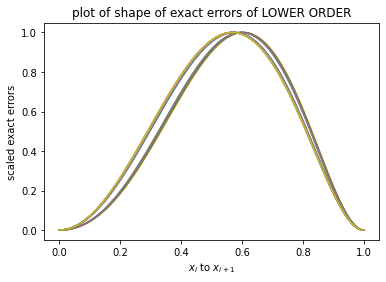

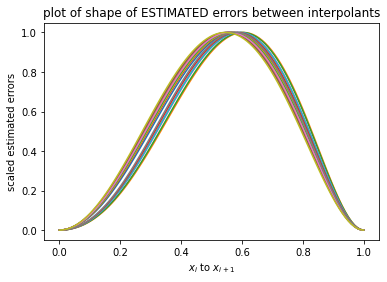

0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
0.0
1.1102230246251565e-16
0.0
5.551115123125783e-17
0.0
0.0
0.0
2.7755575615628914e-17
0.0
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000009, 0.9999999999999981, 0.5000000000000004, 1.9999999999999982, 0.5000000000000009]
beta values [0.5, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982, 0.5000000000000004, 1.9999999999999962]
n_steps 57
n_successful_steps 36


Monitor6
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000009, 0.49999999999999956, 0.9999999999999981, 0.5000000000000004, 1.9999999999999982, 0.5000000000000009]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.110000000000005 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.03 <= x <= 10.110000000000005 - evaluating the first interp


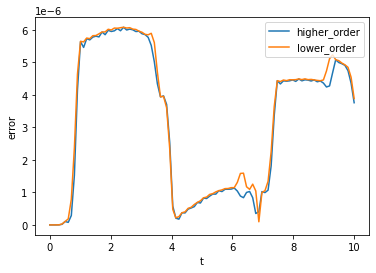

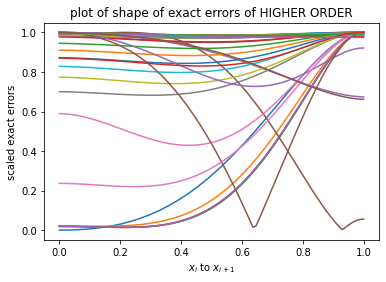

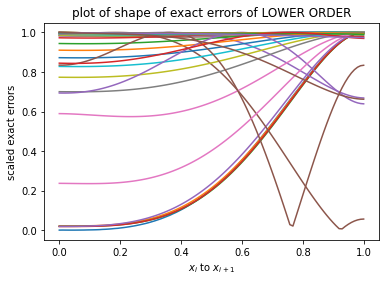

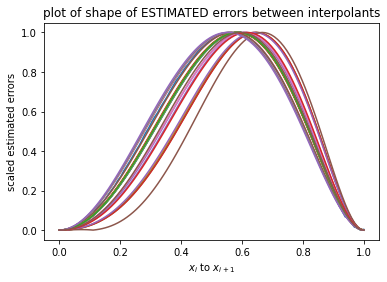

0.0
0.0
0.0
7.893685705084863e-13
3.7754244175403073e-11
1.948597949663622e-09
1.0635209479747942e-07
5.660225678549846e-06
5.746313347376741e-06
5.843057265628171e-06
5.936438064554905e-06
6.013474448285372e-06
6.062903809389564e-06
6.075733901655944e-06
6.045640425833554e-06
5.969195274402317e-06
5.845920464708776e-06
3.940827691284454e-06
2.2150076489646509e-07
3.7583720693956657e-07
5.366988633792591e-07
6.938568129916112e-07
8.377905696410615e-07
9.601925782809495e-07
1.0543805156193464e-06
1.1155984077082515e-06
1.1411947565820313e-06
1.051205700486335e-06
1.0502122407274328e-06
4.437709129195833e-06
4.4561094626333064e-06
4.4748086430457246e-06
4.486734712288998e-06
4.485672319948231e-06
4.466570537986492e-06
4.4257705077987985e-06
5.082392665167745e-06
4.950770585376851e-06
3.2780659894871e-06


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 1.9999999999999982, 0.9999999999999996, 1.0000000000000004, 0.5000000000000004, 2.0000000000000018, 0.49999999999999956, 1.0000000000000009, 0.9999999999999981, 2.0, 0.5000000000000009, 0.9999999999999991, 1.9999999999999962]
beta values [0.9999999999999996, 1.0, 2.0, 2.0000000000000004, 1.9999999999999991, 1.0000000000000004, 0.5000000000000004, 1.9999999999999982, 0.49999999999999956, 2.0000000000000018, 0.9999999999999991, 1.0000000000000018, 0.5, 0.5000000000000009, 1.0000000000000009, 1.9999999999999962]
n_steps 50
n_successful_steps 41


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000002, 0.9999999999999996, 1.0000000000000004, 1.9999999999999982, 0.5000000000000004, 2.0000000000000018, 0.49999999999999956, 1.0000000000000009, 2.0, 0.5000000000000009, 0.9999999999999991, 1.9999999999999962, 0.9999999999999981]
beta values []
n_steps 0
n_successful_steps 0

integration complete
ERROR: 0 is outside of the soluti

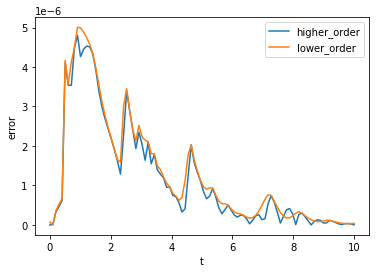

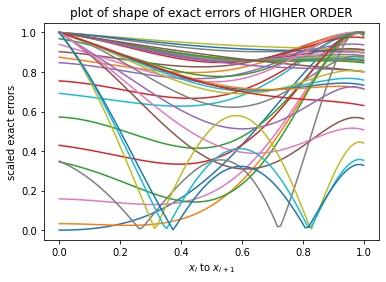

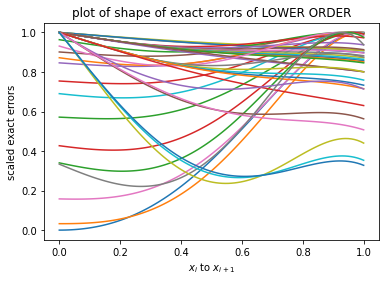

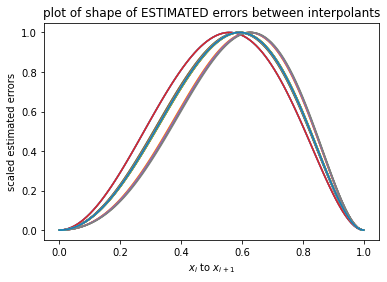

0.0
0.0
0.0
7.112826105881709e-09
2.1855364085165974e-07
3.820842771062871e-07
5.058363630183749e-07
5.96715112322066e-07
6.605727097541703e-07
4.174805908530033e-06
3.7943499838766215e-06
3.4465544658801583e-06
4.972940448932928e-06
4.467301692234749e-06
5.09211075977456e-06
5.24691036324354e-06
5.1038261033586885e-06
4.7829288595258035e-06
4.366612269102177e-06
3.910204650514615e-06
3.4497677225964196e-06
3.0077994983557232e-06
2.5973806755397177e-06
2.225169110636749e-06
1.8935451727708497e-06
1.602134001910116e-06
3.7196165298958306e-06
2.980789206574741e-06
2.3879070929488933e-06
2.5225705295728318e-06
2.2077421415467313e-06
1.7664810971762535e-06
1.340888220902059e-06
9.831143610306015e-07
7.032832509690223e-07
2.016593178666426e-06
1.270680679343883e-06
9.069693605034956e-07
5.107091696210375e-07
2.5908035583555034e-07
7.279951881322688e-07
3.204832412784242e-07
1.1320246162682679e-07
3.710929163958099e-08


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)